In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pylab import rcParams
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [2]:
%matplotlib inline
sb.set(style = 'whitegrid')
rcParams['figure.figsize'] = 5,4

In [3]:
titanic_training = pd.read_csv('titanic-training-data.csv')
titanic_training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_training.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


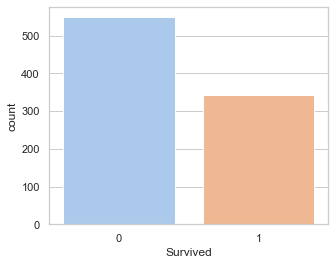

In [5]:
sb.countplot(x='Survived', data = titanic_training, palette = 'pastel')

In [6]:
titanic_training.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [7]:
titanic_training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0, 0.5, 'Number of Passengers who Survived')

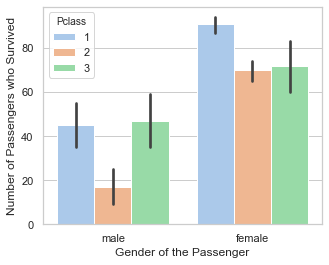

In [8]:
sb.barplot(x ='Sex', y ='Survived', hue = 'Pclass', data = titanic_training, palette = 'pastel', estimator = sum)
plt.xlabel('Gender of the Passenger')
plt.ylabel('Number of Passengers who Survived')

In [9]:
titanic_data = titanic_training.drop(['Name', 'Ticket', 'Cabin'], axis = 1)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


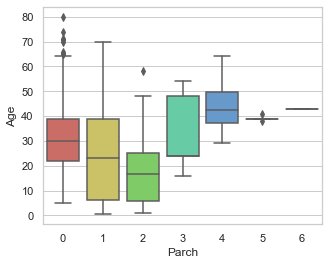

In [10]:
sb.boxplot(x='Parch', y='Age', data = titanic_data, palette = 'hls')

In [11]:
mean_age = titanic_data.Age.mean()
mean_age

29.69911764705882

In [12]:
titanic_mean_ages = pd.DataFrame(titanic_data.groupby(['Parch'])['Age'].mean())
titanic_mean_ages.loc[titanic_mean_ages.index == 5, 'Age'] = mean_age
titanic_mean_ages.loc[titanic_mean_ages.index == 6, 'Age'] = mean_age
titanic_mean_ages

,Age
Parch,
0,32.178503
1,24.422000
2,17.216912
3,33.200000
4,44.500000
5,29.699118
6,29.699118


In [13]:
titanic = pd.merge(titanic_data, titanic_mean_ages, how = 'left', on=['Parch', 'Parch'])

In [14]:
titanic.loc[titanic.Age_x.isnull(), 'Age'] = titanic.Age_y
titanic.loc[~titanic.Age_x.isnull(), 'Age'] = titanic.Age_x
titanic = titanic.drop(['Age_x', 'Age_y'], axis=1)

In [15]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Age            0
dtype: int64

In [16]:
titanic.dropna(inplace=True)
titanic.reset_index(inplace=True, drop = True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
Age            889 non-null float64
dtypes: float64(2), int64(5), object(2)
memory usage: 62.6+ KB


In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [18]:
gender_encoded = label_encoder.fit_transform(titanic['Sex'])
gender_encoded[0:5]

array([1, 0, 0, 0, 1])

In [19]:
gender_df = pd.DataFrame(gender_encoded, columns = ['male'])
gender_df.head()

,male
0,1
1,0
2,0
3,0
4,1


In [20]:
embarked_encoded = label_encoder.fit_transform(titanic['Embarked'])
embarked_encoded[0:20]

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0])

In [21]:
from sklearn.preprocessing import OneHotEncoder
binary_encoder = OneHotEncoder(categories = 'auto')
embarked_1hot = binary_encoder.fit_transform(embarked_encoded.reshape(-1,1))
embarked_df = pd.DataFrame(embarked_1hot.toarray(), columns = ['C', 'Q', 'S']) 
embarked_df.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [22]:
titanic.drop(['Sex', 'Embarked'], axis = 1, inplace = True)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Age
0,1,0,3,1,0,7.2500,22.0
1,2,1,1,1,0,71.2833,38.0
2,3,1,3,0,0,7.9250,26.0
3,4,1,1,1,0,53.1000,35.0
4,5,0,3,0,0,8.0500,35.0


In [23]:
titanic_dummy = pd.concat([titanic, gender_df, embarked_df], axis = 1, verify_integrity = True).astype(float)

In [24]:
titanic_dummy.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Age,male,C,Q,S
0,1.0,0.0,3.0,1.0,0.0,7.2500,22.0,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,1.0,0.0,71.2833,38.0,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,0.0,0.0,7.9250,26.0,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,1.0,0.0,53.1000,35.0,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,0.0,0.0,8.0500,35.0,1.0,0.0,0.0,1.0


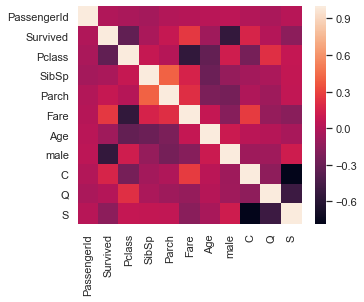

In [32]:
sb.heatmap(titanic_dummy.corr())

In [35]:
titanic_dummy.drop(['Fare', 'Pclass'], axis = 1, inplace = True)

In [37]:
titanic_dummy.head()

,PassengerId,Survived,SibSp,Parch,Age,male,C,Q,S
0,1.0,0.0,1.0,0.0,22.0,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,0.0,38.0,0.0,1.0,0.0,0.0
2,3.0,1.0,0.0,0.0,26.0,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,0.0,35.0,0.0,0.0,0.0,1.0
4,5.0,0.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0


In [40]:
X_train, X_test, y_train, y_test = train_test_split(titanic_dummy.drop(['Survived'], axis = 1),
                                                    titanic_dummy['Survived'], 
                                                    test_size = 0.2, 
                                                    random_state = 200)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(711, 8)
(178, 8)
(711,)


In [44]:
LogReg = LogisticRegression(solver = 'liblinear')
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
y_pred = LogReg.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       109
         1.0       0.79      0.71      0.75        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



In [47]:
y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv = 5)
confusion_matrix(y_train, y_train_pred)

array([[377,  63],
       [ 91, 180]], dtype=int64)

In [48]:
precision_score(y_train, y_train_pred)

0.7407407407407407